### Objective 5: Gendered jobs
Is there a relationship between employment titles and gender? Show the listing of three most popular titles with their respective male and female proportions (exclude unemployed).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# TODO Objective isn't clear enough, FIX

# Reset our data and clean up (exclude unemployed)
bank_users_df = pd.read_csv("bank_users.csv")
bank_users_df = bank_users_df[bank_users_df["employment"] != 'Unemployed']

In [3]:
# Group the dataframe by employment and gender and count occurences of each combo
grouped_by_emp_gender = bank_users_df.groupby(["employment", "gender"]).size().reset_index(name="count")
grouped_by_emp_gender

,employment,gender,count
0,Account Coordinator,Male,6
1,Account Executive,Female,5
2,Account Executive,Male,1
3,Account Representative I,Female,2
4,Account Representative II,Female,1
...,...,...,...
280,Web Developer II,Male,1
281,Web Developer III,Female,1
282,Web Developer III,Male,1
283,Web Developer IV,Female,1


In [4]:
# Calculate the total count for each employment category
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html
grouped_by_emp_gender["total count"] = grouped_by_emp_gender.groupby("employment")["count"].transform("sum")
grouped_by_emp_gender

,employment,gender,count,total count
0,Account Coordinator,Male,6,6
1,Account Executive,Female,5,6
2,Account Executive,Male,1,6
3,Account Representative I,Female,2,2
4,Account Representative II,Female,1,1
...,...,...,...,...
280,Web Developer II,Male,1,1
281,Web Developer III,Female,1,2
282,Web Developer III,Male,1,2
283,Web Developer IV,Female,1,2


In [5]:
# Calculate the male/female proportions for each employment type
grouped_by_emp_gender["proportion"] = grouped_by_emp_gender["count"] / grouped_by_emp_gender["total count"]
grouped_by_emp_gender

# Better, but above is a wee bit easier to read/debug
#total_counts = grouped_by_emp_gender.groupby('employment')['count'].transform('sum')
#grouped_by_emp_gender['proportion'] = grouped_by_emp_gender['count'] / total_counts

,employment,gender,count,total count,proportion
0,Account Coordinator,Male,6,6,1.000000
1,Account Executive,Female,5,6,0.833333
2,Account Executive,Male,1,6,0.166667
3,Account Representative I,Female,2,2,1.000000
4,Account Representative II,Female,1,1,1.000000
...,...,...,...,...,...
280,Web Developer II,Male,1,1,1.000000
281,Web Developer III,Female,1,2,0.500000
282,Web Developer III,Male,1,2,0.500000
283,Web Developer IV,Female,1,2,0.500000


In [6]:
# Sort the dataframe by count in descending order
grouped_by_emp_gender = grouped_by_emp_gender.sort_values(by="total count", ascending=False)
grouped_by_emp_gender.head(15)

# TODO Hmmm... data isn't really good, top three are equally distributed between male/female

,employment,gender,count,total count,proportion
270,VP Product Management,Male,9,18,0.5
269,VP Product Management,Female,9,18,0.5
130,Human Resources Manager,Male,6,12,0.5
129,Human Resources Manager,Female,6,12,0.5
226,Software Consultant,Male,6,12,0.5
225,Software Consultant,Female,6,12,0.5
123,Help Desk Technician,Female,4,10,0.4
124,Help Desk Technician,Male,6,10,0.6
54,Civil Engineer,Female,5,10,0.5
55,Civil Engineer,Male,5,10,0.5


In [7]:
# Get the three most popular titles
top_three_emp_type_df = grouped_by_emp_gender['employment'].unique()[:3]
print(top_three_emp_type_df)

['VP Product Management' 'Human Resources Manager' 'Software Consultant']


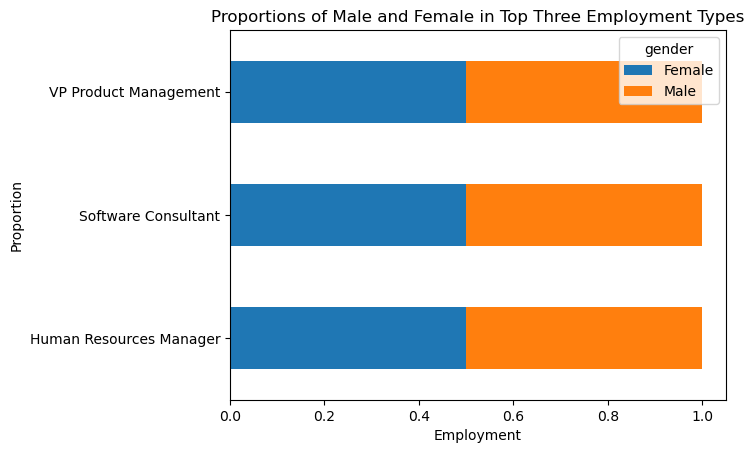

In [8]:
# Include only the top three titles
result_df = grouped_by_emp_gender[grouped_by_emp_gender['employment'].isin(top_three_emp_type_df)]

# Pivot the dataframe to have separate columns for male and female proportions
result_df = result_df.pivot(index='employment', columns='gender', values='proportion')

# Reset the index of the pivot dataframe
result_df = result_df.reset_index()

fig = plt.figure()
emp_by_gender_proportion_ax = fig.add_subplot() 

result_df.plot.barh(ax=emp_by_gender_proportion_ax, x='employment', stacked=True)
emp_by_gender_proportion_ax.set_xlabel('Employment')
emp_by_gender_proportion_ax.set_ylabel('Proportion')
emp_by_gender_proportion_ax.set_title('Proportions of Male and Female in Top Three Employment Types')
plt.show()